In [1]:
import pandas as pd
import numpy as np

***Data Description***

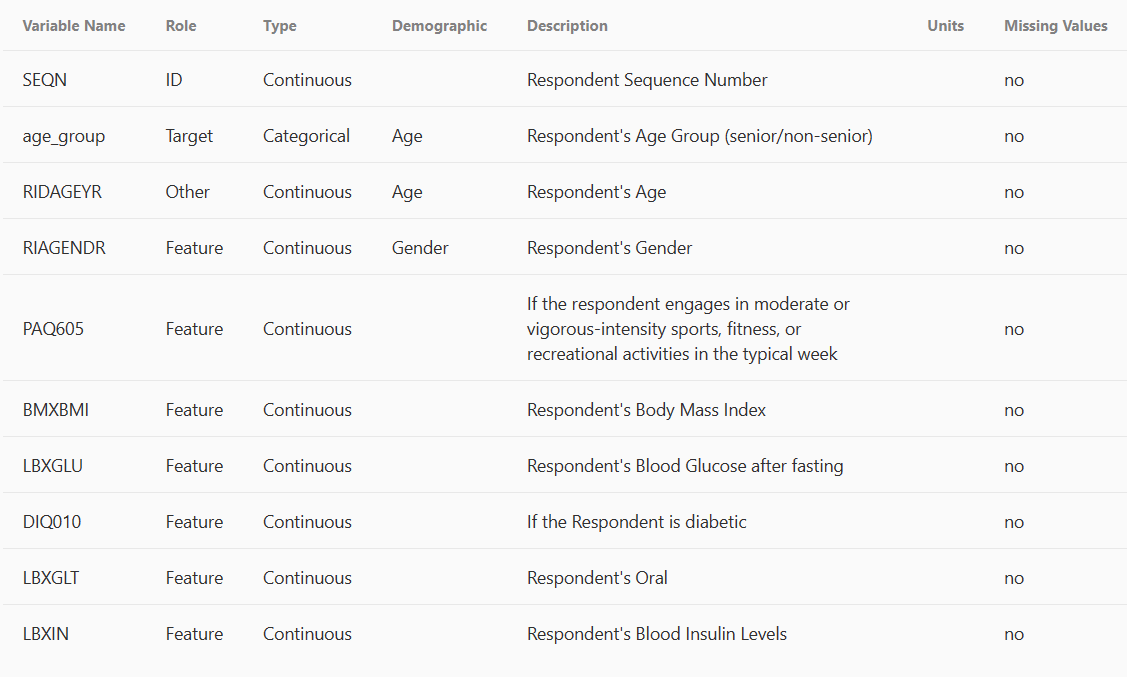

### import data set

In [2]:
nhanes_df = pd.read_csv("NHANES_age_prediction.csv")
nhanes_df.head(-5)

SEQN age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  \
0     73564.0     Adult      61.0       2.0     2.0    35.7   110.0     2.0   
1     73568.0     Adult      26.0       2.0     2.0    20.3    89.0     2.0   
2     73576.0     Adult      16.0       1.0     2.0    23.2    89.0     2.0   
3     73577.0     Adult      32.0       1.0     2.0    28.9   104.0     2.0   
4     73580.0     Adult      38.0       2.0     1.0    35.9   103.0     2.0   
...       ...       ...       ...       ...     ...     ...     ...     ...   
2268  83692.0    Senior      68.0       1.0     2.0    19.1    89.0     2.0   
2269  83694.0     Adult      36.0       2.0     2.0    25.3    99.0     2.0   
2270  83699.0     Adult      37.0       2.0     2.0    20.8    83.0     2.0   
2271  83702.0    Senior      80.0       2.0     2.0    27.9   111.0     2.0   
2272  83707.0     Adult      18.0       1.0     2.0    22.5    98.0     2.0   

      LBXGLT  LBXIN  
0      150.0  14.91  
1       80.0   3.85  
2       68.0   6.14  
3       84.0  16.15  
4       81.0  10.92  
...      ...    ...  
2268   136.0   1.56  
2269   128.0  20.72  
2270   113.0   1.93  
2271    72.0  13.91  
2272    79.0   3.51  

[2273 rows x 10 columns]

In [3]:
nhanes_df.isnull().sum()

SEQN         0
age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64

### Characterisation of the data set

In [4]:
# Display basic information about the dataset
print("Dataset Size:", nhanes_df.shape)
print("Number of Attributes:", len(nhanes_df.columns))
print("Number of Observations:", len(nhanes_df))

# Check for missing values
missing_values = nhanes_df.isnull().sum()
if missing_values.any():
    print("Missing Values:\n", missing_values)
else:
    print("No Missing Values")

# Display additional information about the dataset
print("\nAdditional Information:")
print(nhanes_df.info())

Dataset Size: (2278, 10)
Number of Attributes: 10
Number of Observations: 2278
No Missing Values

Additional Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB
None


### Data Preparation and EDA

In [5]:
len(nhanes_df["SEQN"].unique())

2278

In [6]:
# SEQN sutunu id oldugu icin ve idler unique deger oldugu icin bu bilgiyi kullanamaycagiz bu yuzden siliyoruz

nhanes_df = nhanes_df.drop("SEQN", axis=1)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns 

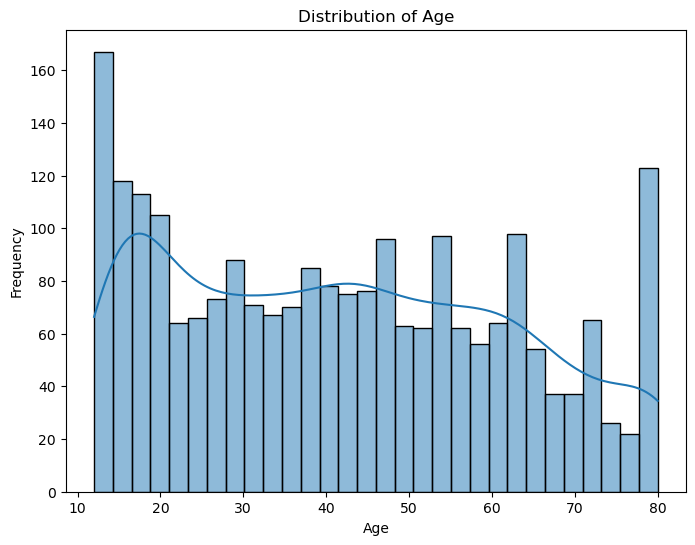

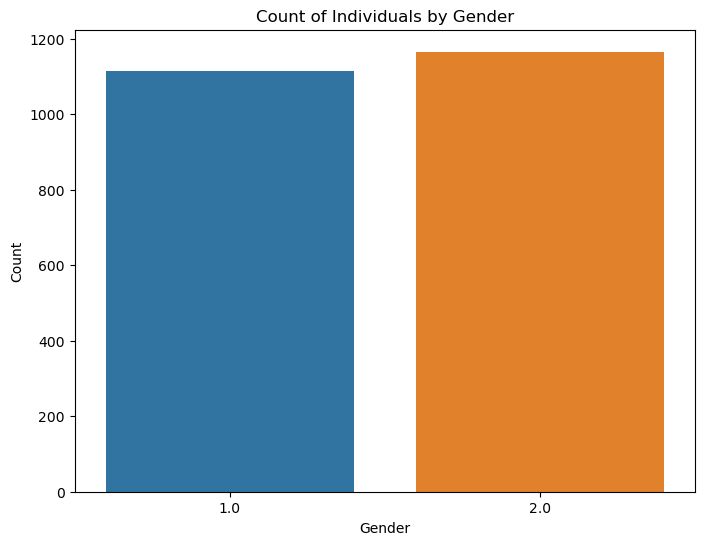

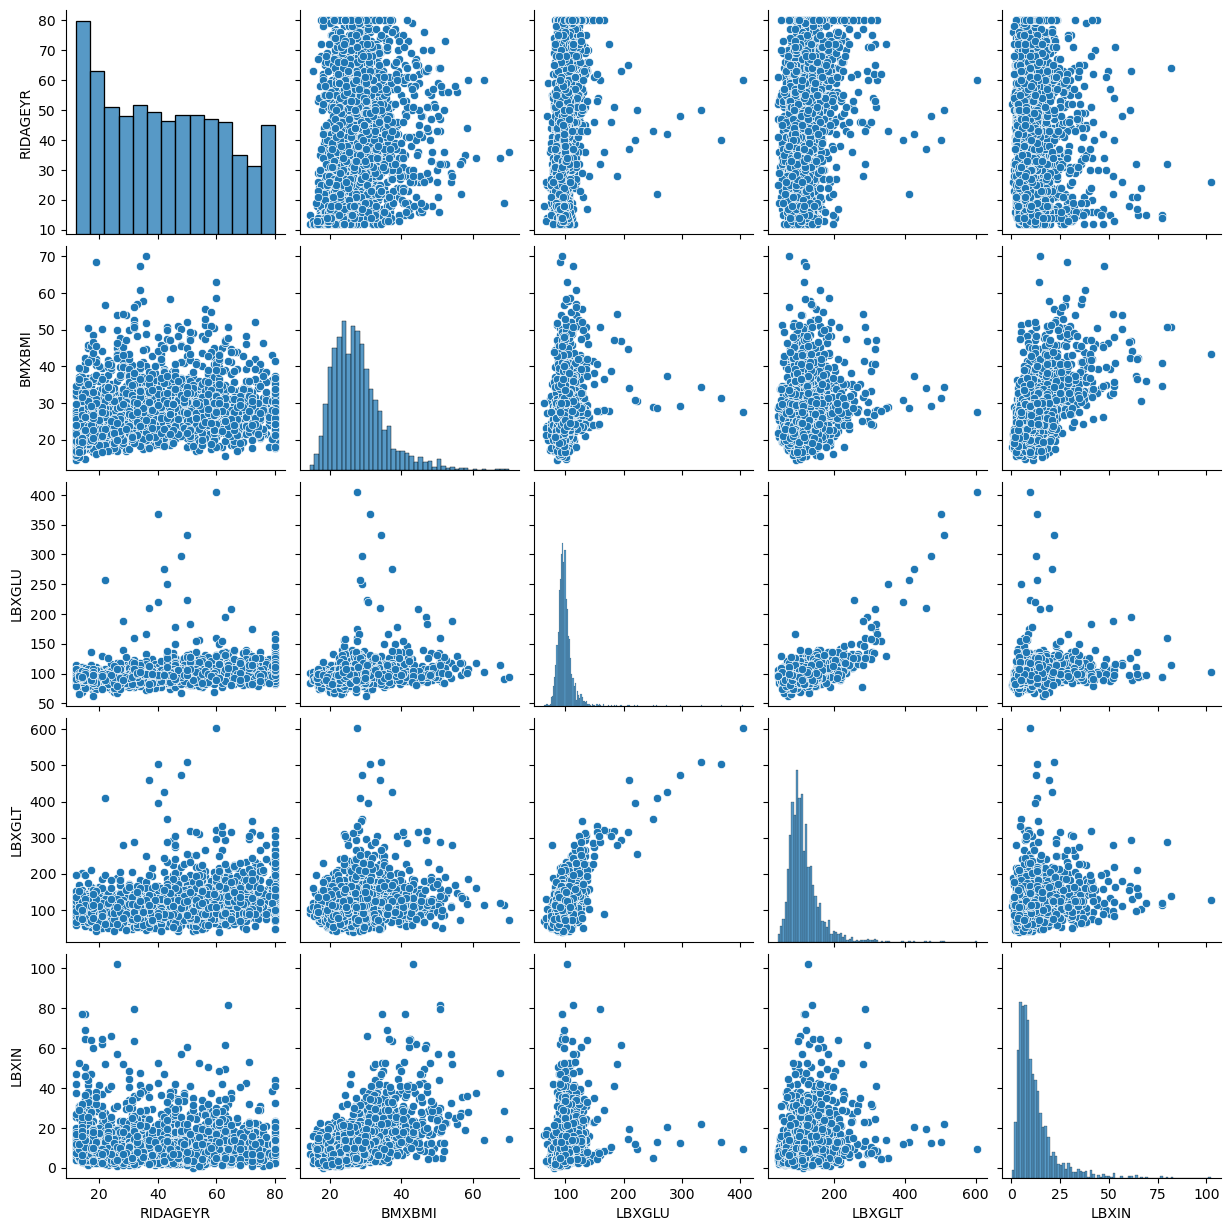

In [8]:
# EDA Visualizations
# Example 1: Histogram of a numerical variable
plt.figure(figsize=(8, 6))
sns.histplot(nhanes_df['RIDAGEYR'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Example 2: Count plot of a categorical variable
plt.figure(figsize=(8, 6))
sns.countplot(x='RIAGENDR', data=nhanes_df)
plt.title('Count of Individuals by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Example 3: Pairplot for numerical variables
numerical_columns = ['RIDAGEYR', 'BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']

sns.pairplot(nhanes_df[numerical_columns])
plt.show()

## Encoding, Scaling, and Feature Engineering

### Using Label Encoding

Sadece bir sutunumuz kategorical verilere sahip ( age_group  ) bunun icin bu encoding uygulamasini yapmaktayiz

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
label_encoder = LabelEncoder()

nhanes_df['age_group_encoded'] = label_encoder.fit_transform(nhanes_df['age_group'])

In [11]:
nhanes_df.head(-5)

age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  \
0        Adult      61.0       2.0     2.0    35.7   110.0     2.0   150.0   
1        Adult      26.0       2.0     2.0    20.3    89.0     2.0    80.0   
2        Adult      16.0       1.0     2.0    23.2    89.0     2.0    68.0   
3        Adult      32.0       1.0     2.0    28.9   104.0     2.0    84.0   
4        Adult      38.0       2.0     1.0    35.9   103.0     2.0    81.0   
...        ...       ...       ...     ...     ...     ...     ...     ...   
2268    Senior      68.0       1.0     2.0    19.1    89.0     2.0   136.0   
2269     Adult      36.0       2.0     2.0    25.3    99.0     2.0   128.0   
2270     Adult      37.0       2.0     2.0    20.8    83.0     2.0   113.0   
2271    Senior      80.0       2.0     2.0    27.9   111.0     2.0    72.0   
2272     Adult      18.0       1.0     2.0    22.5    98.0     2.0    79.0   

      LBXIN  age_group_encoded  
0     14.91                  0  
1      3.85                  0  
2      6.14                  0  
3     16.15                  0  
4     10.92                  0  
...     ...                ...  
2268   1.56                  1  
2269  20.72                  0  
2270   1.93                  0  
2271  13.91                  1  
2272   3.51                  0  

[2273 rows x 10 columns]

### Scaling

let's check the data distribution

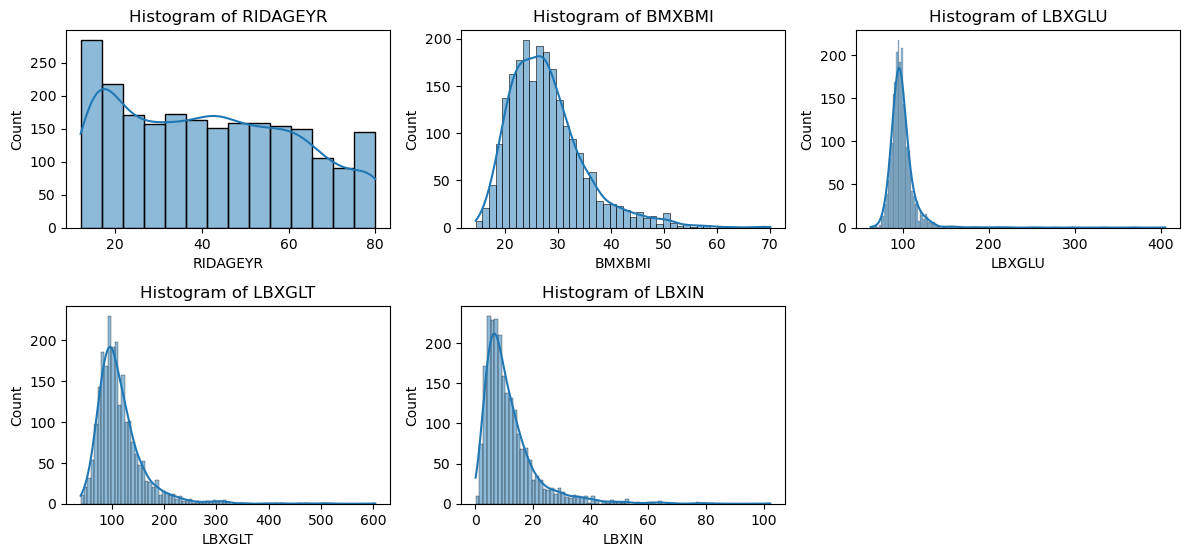

In [12]:
selected_columns = ['RIDAGEYR', 'BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']
subset_df = nhanes_df[selected_columns]

# Histogramlarını çizin
plt.figure(figsize=(12, 8))
for i, column in enumerate(selected_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=subset_df, x=column, kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

Yukarida da goruldugu gibi veri dagilimlari normal bu yuzden standart scaller kullanabiliriz.

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

# Standartlaştırmak istediğiniz özellikleri seçin (X olarak adlandırılmış varsayılan olarak kullanılır)
X = nhanes_df[['RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']]

# Veriyi standartlaştırın ve yeni bir DataFrame'e atayın
X_standardized = scaler.fit_transform(X)

# Standartlaştırılmış veriyi içeren yeni bir DataFrame oluşturun
nhanes_scaled = pd.DataFrame(X_standardized, columns=X.columns)


In [15]:
nhanes_scaled.head()

RIDAGEYR  RIAGENDR    PAQ605    BMXBMI    LBXGLU    DIQ010    LBXGLT  \
0  0.952979  0.977428  0.444672  1.068639  0.584085 -0.087553  0.744323   
1 -0.783849  0.977428  0.444672 -1.056270 -0.590024 -0.087553 -0.743427   
2 -1.280085 -1.023094  0.444672 -0.656125 -0.590024 -0.087553 -0.998470   
3 -0.486107 -1.023094  0.444672  0.130367  0.248625 -0.087553 -0.658413   
4 -0.188365  0.977428 -2.062661  1.096235  0.192715 -0.087553 -0.722174   

      LBXIN  
0  0.316487  
1 -0.821762  
2 -0.586084  
3  0.444103  
4 -0.094147

In [16]:
nhanes_scaled = pd.concat([nhanes_scaled, nhanes_df['age_group_encoded']], axis=1)

In [17]:
nhanes_scaled.head(-5)

RIDAGEYR  RIAGENDR    PAQ605    BMXBMI    LBXGLU    DIQ010    LBXGLT  \
0     0.952979  0.977428  0.444672  1.068639  0.584085 -0.087553  0.744323   
1    -0.783849  0.977428  0.444672 -1.056270 -0.590024 -0.087553 -0.743427   
2    -1.280085 -1.023094  0.444672 -0.656125 -0.590024 -0.087553 -0.998470   
3    -0.486107 -1.023094  0.444672  0.130367  0.248625 -0.087553 -0.658413   
4    -0.188365  0.977428 -2.062661  1.096235  0.192715 -0.087553 -0.722174   
...        ...       ...       ...       ...       ...       ...       ...   
2268  1.300344 -1.023094  0.444672 -1.221847 -0.590024 -0.087553  0.446773   
2269 -0.287612  0.977428  0.444672 -0.366365 -0.030925 -0.087553  0.276744   
2270 -0.237989  0.977428  0.444672 -0.987279 -0.925484 -0.087553 -0.042059   
2271  1.895828  0.977428  0.444672 -0.007614  0.639995 -0.087553 -0.913456   
2272 -1.180838 -1.023094  0.444672 -0.752712 -0.086835 -0.087553 -0.764681   

         LBXIN  age_group_encoded  
0     0.316487                  0  
1    -0.821762                  0  
2    -0.586084                  0  
3     0.444103                  0  
4    -0.094147                  0  
...        ...                ...  
2268 -1.057439                  1  
2269  0.914428                  0  
2270 -1.019360                  0  
2271  0.213572                  1  
2272 -0.856753                  0  

[2273 rows x 9 columns]

## comparison of PCA and LDA

In [18]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [19]:
# PCA
# Bu durumda, hedef değişkenini çıkararak PCA'ya uyguluyoruz çünkü PCA, veri setinin varyansını maksimize etmeye odaklanır ve hedef bilgisine ihtiyaç duymaz.
X_scaled_pca = nhanes_scaled.drop('age_group_encoded', axis=1)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_pca)

In [20]:
# LDA
lda = LinearDiscriminantAnalysis()

X_lda = nhanes_scaled.drop('age_group_encoded', axis=1)
y_lda = nhanes_scaled['age_group_encoded']

X_lda_transformed  = lda.fit_transform(X_lda, y_lda)

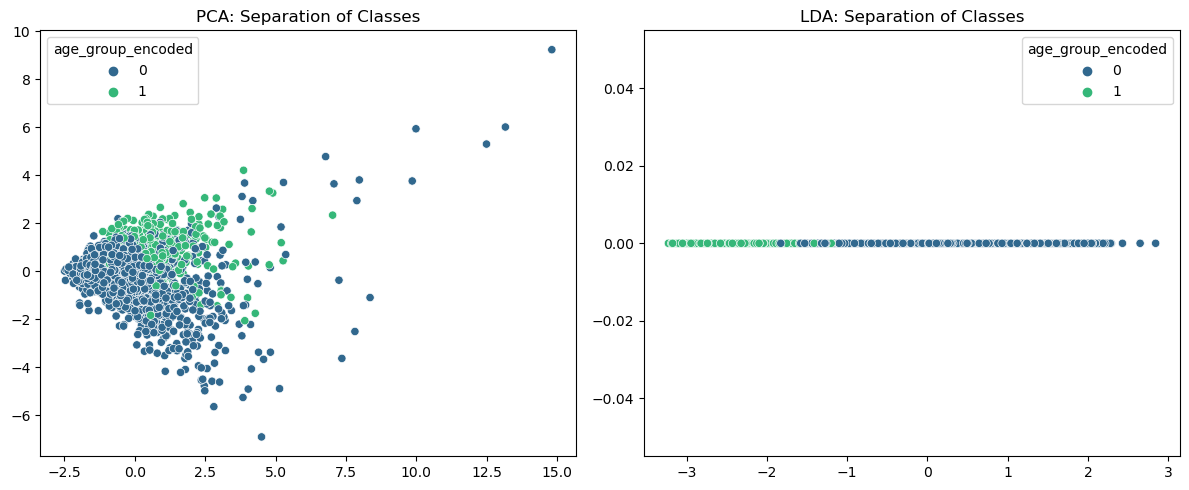

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# PCA Görselleştirmesi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_lda, palette='viridis')
plt.title('PCA: Separation of Classes')

# LDA Görselleştirmesi
plt.subplot(1, 2, 2)
# Eğer LDA sonucu tek boyutlu ise, sadece [:, 0] kullanılmalı
if X_lda_transformed.shape[1] == 1:
    sns.scatterplot(x=X_lda_transformed[:, 0], y=[0] * len(X_lda_transformed), hue=y_lda, palette='viridis')
else:
    sns.scatterplot(x=X_lda_transformed[:, 0], y=X_lda_transformed[:, 1], hue=y_lda, palette='viridis')

plt.title('LDA: Separation of Classes')

plt.tight_layout()
plt.show()


Linear Discriminant Analysis (LDA) ve Principal Component Analysis (PCA) arasındaki temel farkları kendi kelimelerinizle açıklamak ve elde ettiğiniz sonuçların normal ve anormal tekliflerin sınıflandırılması veya kümeleme analizi üzerindeki etkilerini tartışmak istediğinizde şu unsurlara odaklanabilirsiniz:

Amaç:

PCA: Veri setindeki değişkenler arasındaki en büyük varyansı bulma ve bu varyansı az sayıda yeni özelliğe yansıtma üzerine odaklanır.
LDA: Sınıflar arasındaki ayrımı maksimize etmeye odaklanır. Bu, sınıfları birbirinden mümkün olduğunca uzaklaştırmayı amaçlar.
Veri Dönüşümü:

PCA: Sınıf bilgisini dikkate almaz, yalnızca değişkenler arasındaki kovaryansı ele alır.
LDA: Sınıf bilgisini kullanarak, sınıflar arasındaki farkları vurgular ve sınıflar arasında daha fazla ayrım sağlar.
Boyut:

PCA: Tüm veri setinin varyansını korumak için kullanılabilir, bu nedenle orijinal veri seti boyutunda kalabilir.
LDA: Genellikle sınıfların sayısı kadar diskriminant fonksiyon üretir ve bu nedenle sınıf sayısına bağlı olarak boyut indirgeme yapar.
Sınıflandırma veya Kümeleme Analizi Üzerindeki Etkileri:

PCA: Genelde sınıflar arasındaki ayrımı gözetmez, bu nedenle sınıflandırma veya kümeleme amacıyla kullanılacaksa, sınıfları ayırt etme yeteneği sınırlı olabilir.
LDA: Sınıflar arasındaki ayrımı artırarak, sınıflandırma ve kümeleme için daha etkili olabilir. Eğer sınıflar arasındaki ayrım önemliyse, LDA tercih edilebilir.
Sonuçlarınızın normal ve anormal teklifleri sınıflandırmak veya kümelemek üzerindeki etkilerini değerlendirirken, eğer sınıflar arasındaki ayrım önemliyse ve sınıf bilgisini kullanmak istiyorsanız, LDA daha etkili olabilir. PCA, genel varyansı koruma odaklı olduğu için sınıf bilgisini dikkate almaz ve bu nedenle sınıflandırma veya kümeleme performansını etkileyebilir. Ancak, veri setinizin özelliklerine ve problem bağlamınıza bağlı olarak her iki yöntemi de denemeniz ve sonuçları dikkatlice değerlendirmeniz önemlidir.

## Machine Learning Approaches

Supervised learning : It is a machine learning technique that produces a function from training data. In other words, this learning technique produces a function that maps between inputs (labeled data) and desired outputs. Training data consists of both inputs and outputs. The function can be determined by classification or regression algorithms.

Logical Justification for the Dataset: In the provided NHANES dataset, if you have labeled data indicating whether individuals are seniors or non-seniors, supervised learning can be employed. Potential tasks include predicting the age group (senior or non-senior) based on health-related features, which aligns with the labeled data available in the dataset. Supervised learning models, such as classification algorithms, can be trained on this labeled data to make predictions on new, unseen instances.

Supervised Learning Algorithms:

Classification:

Logistic Regression: Used for binary or multiclass classification.
Support Vector Machines (SVM): Separates the dataset into classes using hyperplanes.
Decision Trees: Makes decisions based on a tree-like model.
Random Forest: Ensemble method combining multiple decision trees.
k-Nearest Neighbors (k-NN): Classifies data based on its nearest neighbors.

Regression:

Linear Regression: Models a linear relationship to predict numerical output.
Ridge Regression: Improves linear regression, resistant to overfitting.
Lasso Regression: Improves linear regression, aids in feature selection.
Decision Trees for Regression: Predicts numerical output using tree structures.
Gradient Boosting Regressor: Combines weak predictors for regression.


Unsupervised learning : This method is a machine learning technique that uses a function to predict an unknown structure from unlabelled data. Here, it is unclear which class the input data belongs to.

Unsupervised Learning Algorithms:

Clustering:

K-Means: Groups data into a specified number of clusters (k).
Hierarchical Clustering: Divides data into clusters using a tree structure.
DBSCAN (Density-Based Spatial Clustering of Applications with Noise): Density-based clustering algorithm.

Logical Justification for the Dataset: If the NHANES dataset lacks labeled information on whether an individual is a senior or non-senior, or if you want to explore inherent patterns in the data without a predefined target variable, unsupervised learning is relevant. Clustering algorithms can be used to identify natural groupings of individuals based on health features without prior knowledge of age groups. Dimensionality reduction techniques, like PCA or LDA, can be employed to visualize and analyze the structure of the data without relying on labeled information. 

Logical Decision:
If the goal is to predict age groups based on known labeled data, supervised learning (classification) would be the appropriate choice. If the goal is to explore inherent patterns, relationships, or groupings within the data without the need for labeled information, unsupervised learning techniques (clustering or dimensionality reduction) would be more suitable. Ultimately, the choice between supervised and unsupervised learning depends on the specific objectives of your analysis and the availability of labeled data in the NHANES dataset.

As we saw when we examined the NHANES dataset, we have target data. In this case, it would be more meaningful to use supervised learning techniques.


## Machine Learning Models / Hyperparameter Tuning

In [26]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [48]:
# Our fetures: X_lda_transformed and our target value is y_lda

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lda_transformed, y_lda, test_size=0.2, random_state=42)

# Random Forest for Classification
rf_classifier = RandomForestClassifier()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': range(2, 20, 5),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Accuracy: {accuracy}")



Best Accuracy: 0.9736842105263158


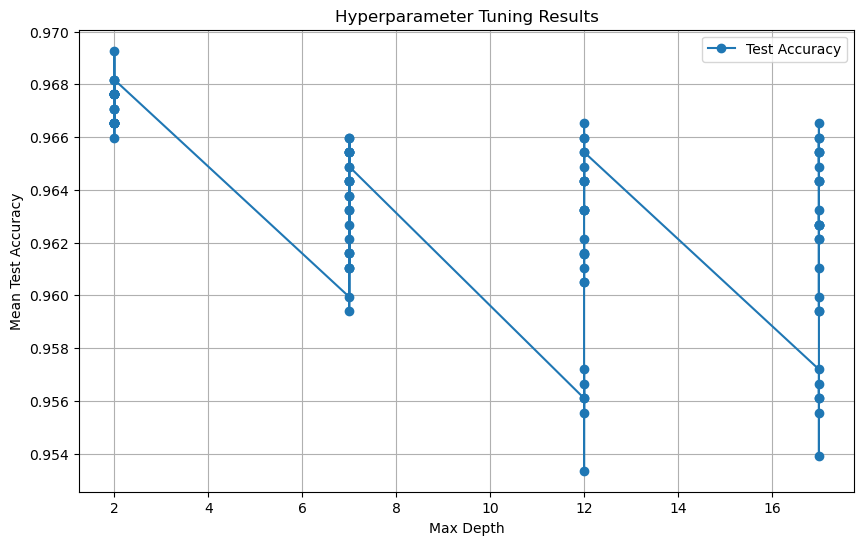

Best Accuracy: 0.96927291886196
Best Parameters: {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Hiperparametre sonuçlarını alın
scores = grid_search.cv_results_

# Max depth'e göre test skorlarını çizin
plt.figure(figsize=(10, 6))
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="Test Accuracy", 
         marker='o')

plt.xlabel("Max Depth")
plt.ylabel("Mean Test Accuracy")
plt.title("Hyperparameter Tuning Results")
plt.legend()
plt.grid(True)
plt.show()

# GridSearchCV sonuçlarını gösteren bir DataFrame oluşturun
results_df = pd.DataFrame(scores)

# En iyi parametreleri ve skoru ekrana yazdırın
print('Best Accuracy:', grid_search.best_score_)
print('Best Parameters:', grid_search.best_params_)


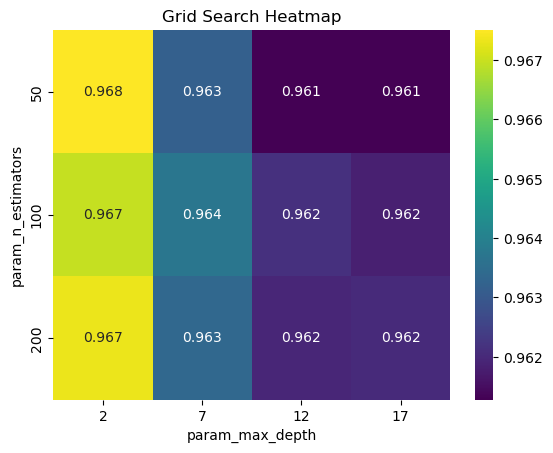

In [50]:
# Grid Search sonuçlarını DataFrame'e çevirme
results_df = pd.DataFrame(grid_search.cv_results_)

# Heatmap oluşturma
heatmap_data = results_df.pivot_table(index='param_n_estimators', columns='param_max_depth', values='mean_test_score', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".3f")
plt.title('Grid Search Heatmap')
plt.show()


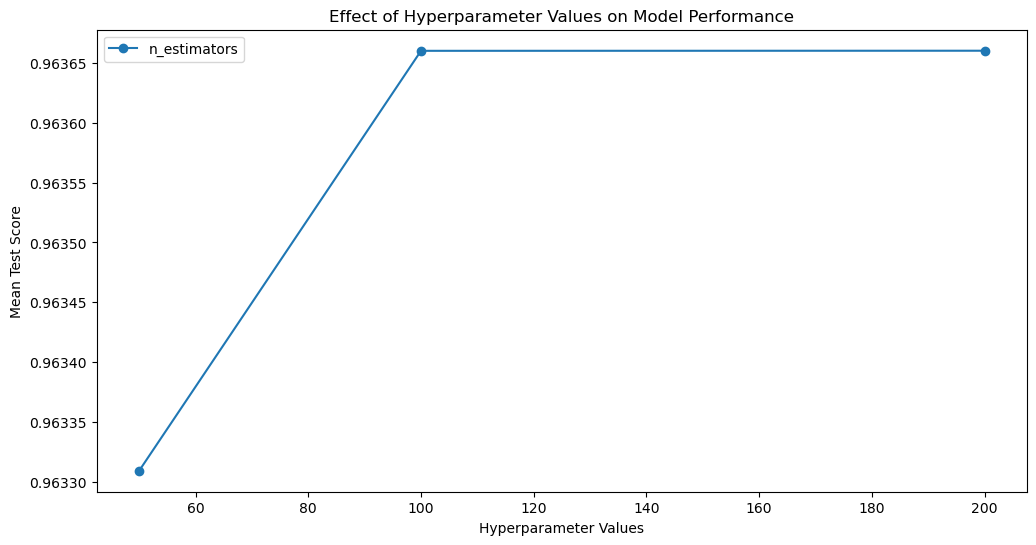

In [51]:
plt.figure(figsize=(12, 6))

# Sadece 'n_estimators' hiperparametresini seçme
param = 'n_estimators'
param_values = param_grid[param]

# Hiperparametrelerin performans üzerindeki etkisinin gösterilmesi
plt.plot(param_values, results_df.groupby(f'param_{param}')['mean_test_score'].mean(), marker='o', label=param)

plt.xlabel('Hyperparameter Values')
plt.ylabel('Mean Test Score')
plt.title('Effect of Hyperparameter Values on Model Performance')
plt.legend()
plt.show()


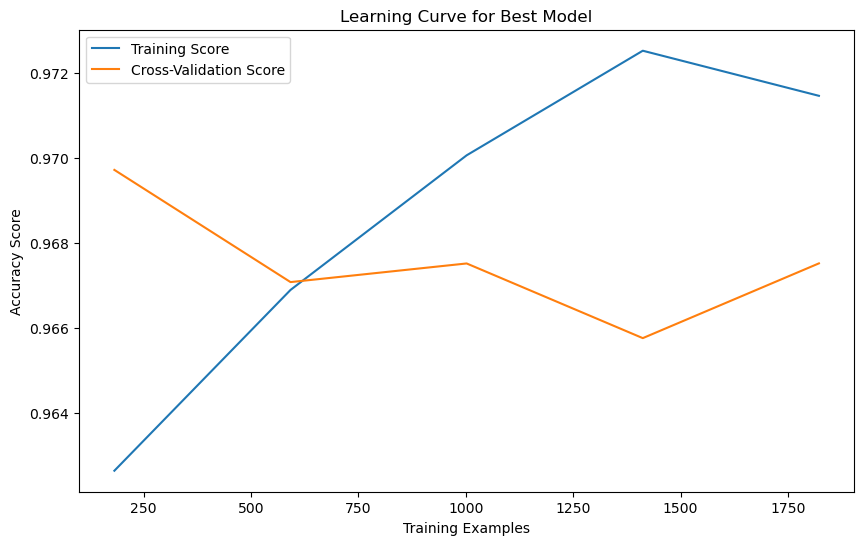

In [52]:
from sklearn.model_selection import learning_curve

# En iyi parametrelerle modeli oluşturma
best_rf_classifier = RandomForestClassifier(**best_params)

# Öğrenme eğrisi oluşturma
train_sizes, train_scores, test_scores = learning_curve(best_rf_classifier, X_lda_transformed, y_lda, cv=5, scoring='accuracy')

# Ortalamaları hesaplayarak çizim yapma
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve for Best Model')
plt.legend()
plt.show()


### Clustering with KMeans

In [43]:
from sklearn.cluster import KMeans

C:\Users\sertacbattal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


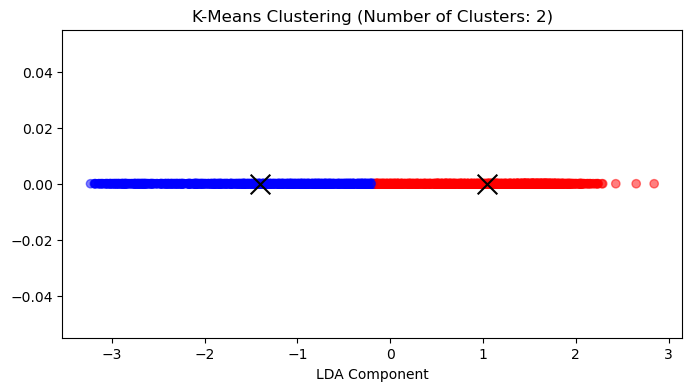

C:\Users\sertacbattal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


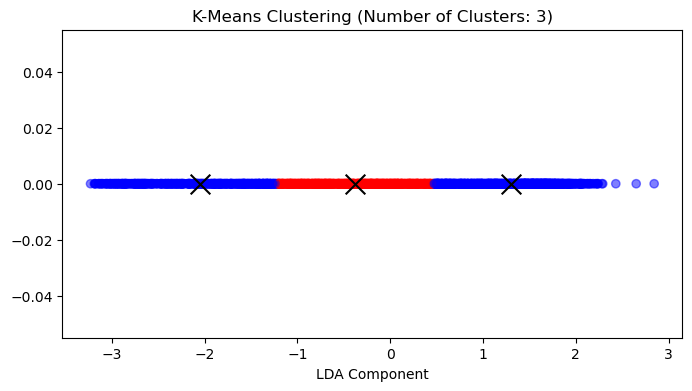

C:\Users\sertacbattal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


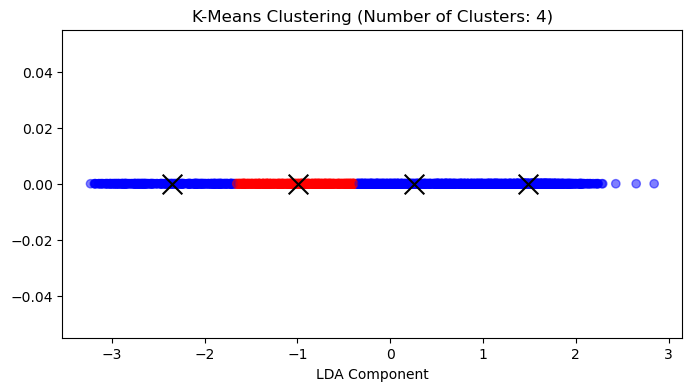

In [53]:
# Farklı küme sayıları için K-Means modelini değerlendirme (2,3,4)

for n_clusters in range(2, 5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Modeli eğitin ve kümeleme gerçekleştirin
    kmeans.fit(X_lda_transformed)
    
    # Her veri noktasını bir kümeye atayın
    cluster_labels = kmeans.labels_
    
    # Küme merkezlerini alın
    cluster_centers = kmeans.cluster_centers_
    
    # Küme sayısına göre renkleri belirleyin (isteğe bağlı)
    colors = ['red' if label == 0 else 'blue' for label in cluster_labels]

    # Kumelerin gorsellestirmesi
    plt.figure(figsize=(8, 4))
    plt.scatter(X_lda_transformed[:, 0], [0] * len(X_lda_transformed), c=colors, alpha=0.5)
    plt.scatter(cluster_centers[:, 0], [0] * len(cluster_centers), c='black', marker='x', s=200)
    plt.title(f'K-Means Clustering (Number of Clusters: {n_clusters})')
    plt.xlabel('LDA Component')
    plt.show()


## train and test the Machine learning models

In [68]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


Split 1 Accuracy: 0.9714912280701754
Split 1 Cross-Validation Scores: [0.97368421 0.96052632 0.97587719 0.96923077 0.97582418]
Split 1 Mean Cross-Validation Score: 0.9710285328706382


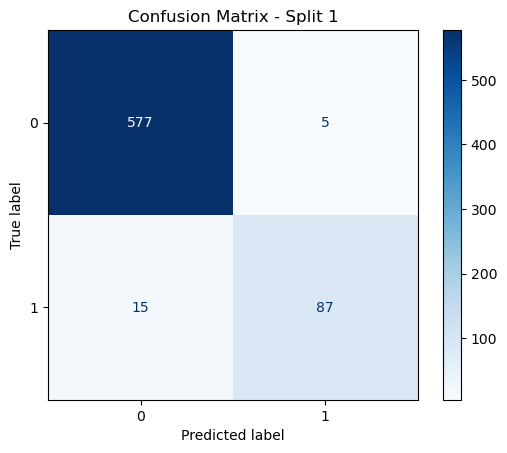

Split 1 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       382
           1       0.92      0.91      0.91        74

    accuracy                           0.97       456
   macro avg       0.95      0.94      0.95       456
weighted avg       0.97      0.97      0.97       456

Split 2 Accuracy: 0.9736842105263158
Split 2 Cross-Validation Scores: [0.97368421 0.96052632 0.97587719 0.96923077 0.97582418]
Split 2 Mean Cross-Validation Score: 0.9710285328706382


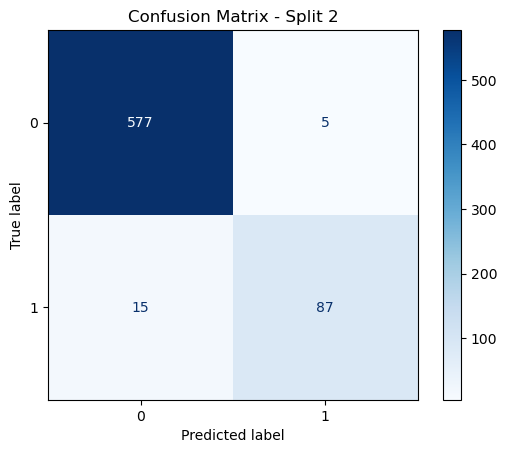

Split 2 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       575
           1       0.93      0.91      0.92       109

    accuracy                           0.97       684
   macro avg       0.95      0.95      0.95       684
weighted avg       0.97      0.97      0.97       684

Split 3 Accuracy: 0.9707602339181286
Split 3 Cross-Validation Scores: [0.97149123 0.96052632 0.97587719 0.96923077 0.97582418]
Split 3 Mean Cross-Validation Score: 0.9705899363794102


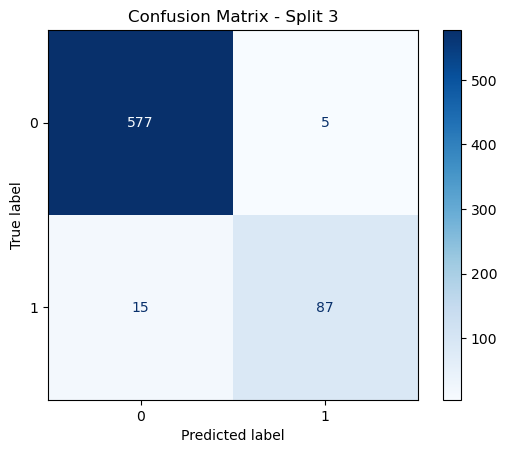

Split 3 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       582
           1       0.95      0.85      0.90       102

    accuracy                           0.97       684
   macro avg       0.96      0.92      0.94       684
weighted avg       0.97      0.97      0.97       684



In [73]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Our features: X_lda_transformed and our target value is y_lda

# Split the data into two different splits
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_lda_transformed, y_lda, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_lda_transformed, y_lda, test_size=0.3, random_state=54)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_lda_transformed, y_lda, test_size=0.3, random_state=99)

# List to store results
results = []

# Define K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through different splits
for i, (X_train, X_test, y_train, y_test) in enumerate([(X_train1, X_test1, y_train1, y_test1),
                                                         (X_train2, X_test2, y_train2, y_test2),
                                                         (X_train3, X_test3, y_train3, y_test3)], start=1):
    
    # Random Forest for Classification
    # Fitting the final model with the best parameters obtained from grid search
    rf_classifier = RandomForestClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50)
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Split {i} Accuracy: {accuracy}")

    # Cross-validation
    cv_scores = cross_val_score(rf_classifier, X_lda_transformed, y_lda, cv=kf, scoring='accuracy')
    print(f"Split {i} Cross-Validation Scores:", cv_scores)
    print(f"Split {i} Mean Cross-Validation Score:", np.mean(cv_scores))
    

    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_lda))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - Split {i}")
    plt.show()

    # Classification Report
    class_report = classification_report(y_test, y_pred)
    print(f"Split {i} Classification Report:")
    print(class_report)

    # Store results
    results.append({
        'split': i,
        'accuracy': accuracy,
        'cv_mean_score': np.mean(cv_scores),
        'conf_matrix': conf_matrix,
        'class_report': class_report
    })


